The notebook sections are broken down to the following:

1. EDA

  This is where we perform EDA on the data.
2. Modelling 

  This is where we put the relevant code to produce results on the train set, and how we find the best model to be used in test set prediction.

  If the marker would like to run this section, then they must set the parameters at the start of the section and run it entirely to see what the best results are. 
3. Predictions on test set

  This is the code that should be run as the marker of our group's assignment - it will take the best model we selected from the modelling section, re-train on entire train set. Finally, we make predictions on the test set using this model.


**For markers of our assignment, most important thing to run is the test set prediction section, found at the end/final section of our notebook.**

Note that we assume that both the ATM_test.csv and ATM_training.csv is also stored in the same folder as the python file. 

Run all the imports and code cell below.

In [2]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

# Multiple Linear Regression
import statsmodels.api as sm
from sklearn import linear_model

# Advanced/Regressions with regularization
from sklearn.linear_model import LassoCV, RidgeCV,ElasticNetCV, ElasticNet, Ridge, Lasso,LinearRegression

# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor

# Neural network / Multilayer perceptron
import keras
from keras.layers.core import Dense, Activation, Dropout 
from keras.models import Sequential
from keras import backend as K

# For model selection
from sklearn.model_selection import KFold, cross_val_score, train_test_split

# Helper tools
from statsmodels.tools.tools import pinv_extended  

# Metric for testing against validation set
from sklearn.metrics import mean_squared_error

# Reading in data
# This is the training data
csv = pd.read_csv('ATM_training.csv')  

test = pd.read_csv('ATM_test.csv')  


# Make sure to run this before starting notebook
np.random.seed(0)
random_state = 0
kf=KFold(5, shuffle=True, random_state=random_state) 

# EDA

In [ ]:
import ipython_genutils # For display() function

def basic_eda(data):
  '''displays basic infomation about data'''
  print('Head, tail and shape of data:')
  display(data);
  print('\nBasic data info:')
  display(data.info());
  print('\nStatistics for each column:')
  display(data.describe());
  print('\nCheck for NULL data:')
  display(data.isna().sum())

basic_eda(csv)

Head, tail and shape of data:


,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
0,10.18,10,1,0,0,0,72.750556
1,9.74,10,1,1,0,0,66.720482
2,0.96,2,0,0,0,1,19.189516
3,9.58,9,1,1,0,1,67.388669
4,1.03,4,0,1,0,1,15.813127
...,...,...,...,...,...,...,...
21995,10.15,12,1,0,0,0,71.384290
21996,1.01,2,0,1,0,0,16.031066
21997,0.96,3,0,1,0,0,14.968847
21998,9.91,6,1,0,0,0,73.705665



Basic data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Shops     22000 non-null  float64
 1   ATMs      22000 non-null  int64  
 2   Downtown  22000 non-null  int64  
 3   Weekday   22000 non-null  int64  
 4   Center    22000 non-null  int64  
 5   High      22000 non-null  int64  
 6   Withdraw  22000 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 1.2 MB


None


Statistics for each column:


,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
count,22000.000000,22000.000000,22000.00000,22000.000000,22000.000000,22000.000000,22000.000000
mean,7.316373,7.937455,0.70200,0.714091,0.102455,0.301591,54.652818
std,4.118692,3.673415,0.45739,0.451857,0.303252,0.458959,25.099767
min,0.800000,0.000000,0.00000,0.000000,0.000000,0.000000,11.668197
25%,1.050000,4.000000,0.00000,0.000000,0.000000,0.000000,18.500386
50%,9.890000,9.000000,1.00000,1.000000,0.000000,0.000000,68.240749
75%,10.070000,11.000000,1.00000,1.000000,0.000000,1.000000,71.345778
max,10.830000,17.000000,1.00000,1.000000,1.000000,1.000000,103.964065



Check for NULL data:


Shops       0
ATMs        0
Downtown    0
Weekday     0
Center      0
High        0
Withdraw    0
dtype: int64

We note from the above: 

*   Shape: 22000 rows × 7 columns 
    * Relatively small dataset (training times should not be long)
*   There are no NULL values in the data
*   The scale for different columns/variables vary relatively greatly 
    * data should be scaled before use in training on distance based or gradient descent based algorithms



In [ ]:
# Downtown, Weekday, Center, and High look like binary variables, lets check:
for col in ['Downtown', 'Weekday', 'Center', 'High']:
    print(f'{col} has unique values: {csv[col].unique()}')

Downtown has unique values: [ 0.65152293 -1.53479563]
Weekday has unique values: [-1.58034861  0.63274302]
Center has unique values: [-0.3378528  2.9597344]
High has unique values: [-0.65711943  1.5217242 ]


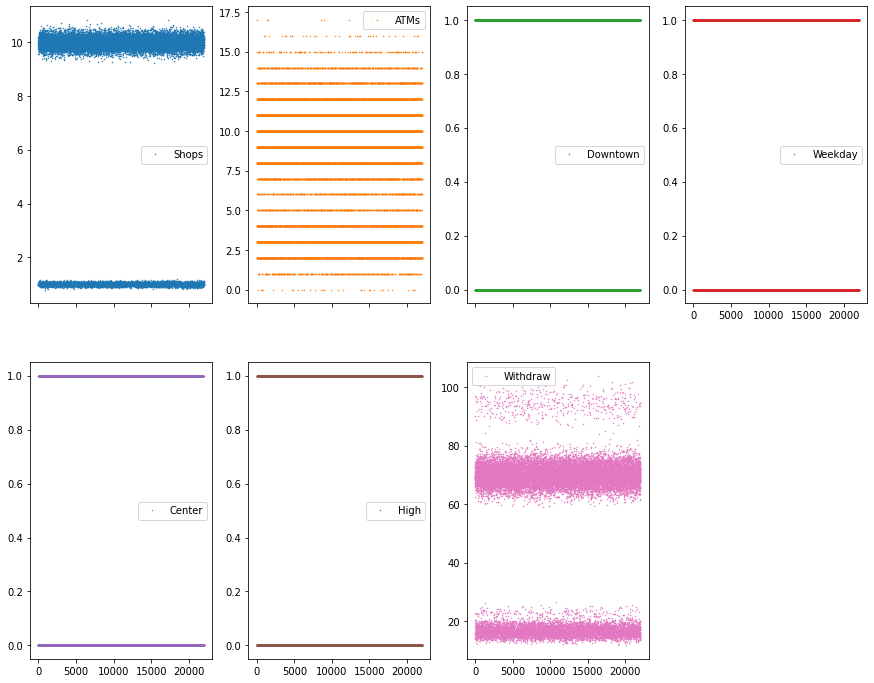

In [ ]:
# Look at the distribution of each individual variable including the dependent variable 'Withdraw'
csv.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 12), markersize=1);

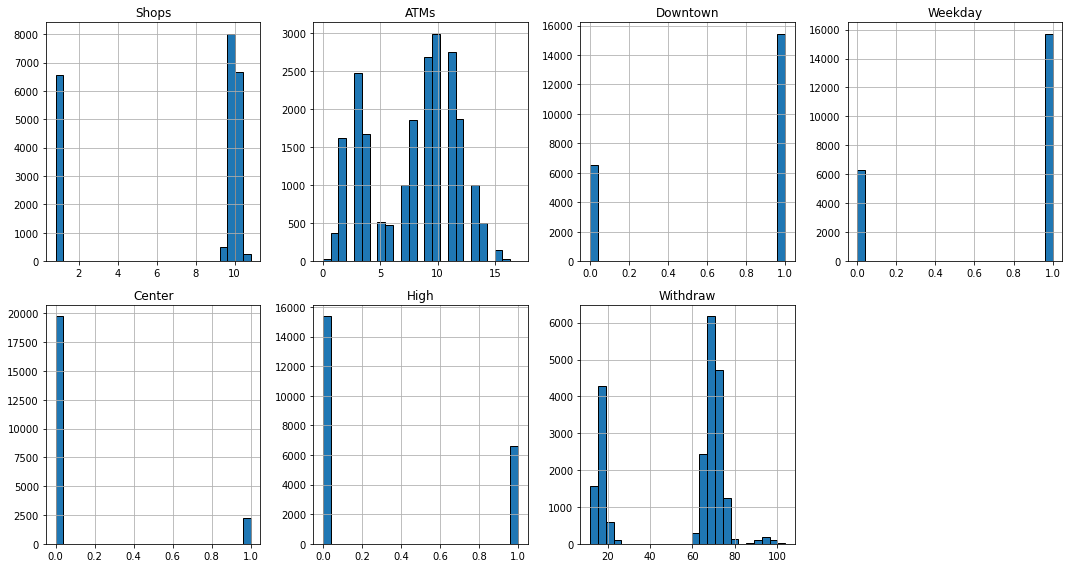

In [ ]:
# Look at histogram of distributions of each variable
csv.hist(bins=25, figsize=(15, 8), layout=(-1, 4), edgecolor="black")
plt.tight_layout();

In [ ]:
# Observe the correlation between variables in the dataset
corr = csv.corr()
corr.style.background_gradient(cmap='coolwarm')
# Shops, Downtown, and Withdraw are highly correlated 
# This may imply that Shops and Downtown are good predictors of Withdraw 

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
Shops,1.000000,0.872903,0.999131,0.013014,0.000004,0.001820,0.985797
ATMs,0.872903,1.000000,0.873726,0.009766,-0.003306,-0.002616,0.824030
Downtown,0.999131,0.873726,1.000000,0.012664,-0.000101,0.001782,0.983574
Weekday,0.013014,0.009766,0.012664,1.000000,-0.007153,-0.006793,-0.050470
Center,0.000004,-0.003306,-0.000101,-0.007153,1.000000,0.010521,0.088103
High,0.001820,-0.002616,0.001782,-0.006793,0.010521,1.000000,0.021275
Withdraw,0.985797,0.824030,0.983574,-0.050470,0.088103,0.021275,1.000000


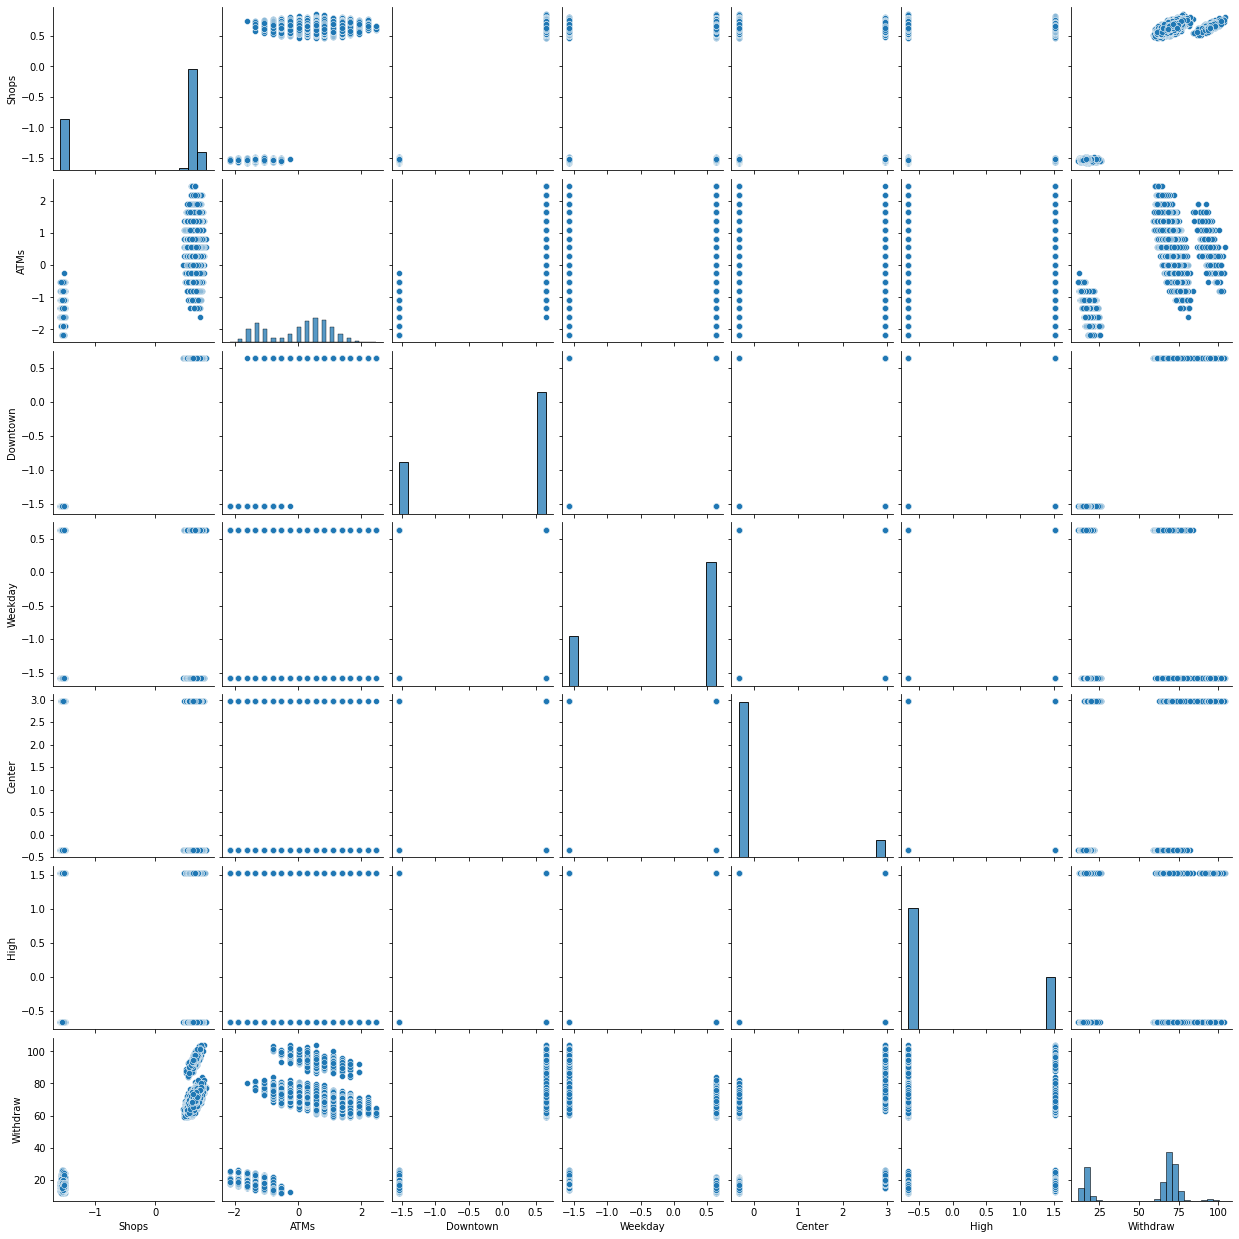

In [ ]:
# Pairwise plot of variables in data
sns.pairplot(csv)

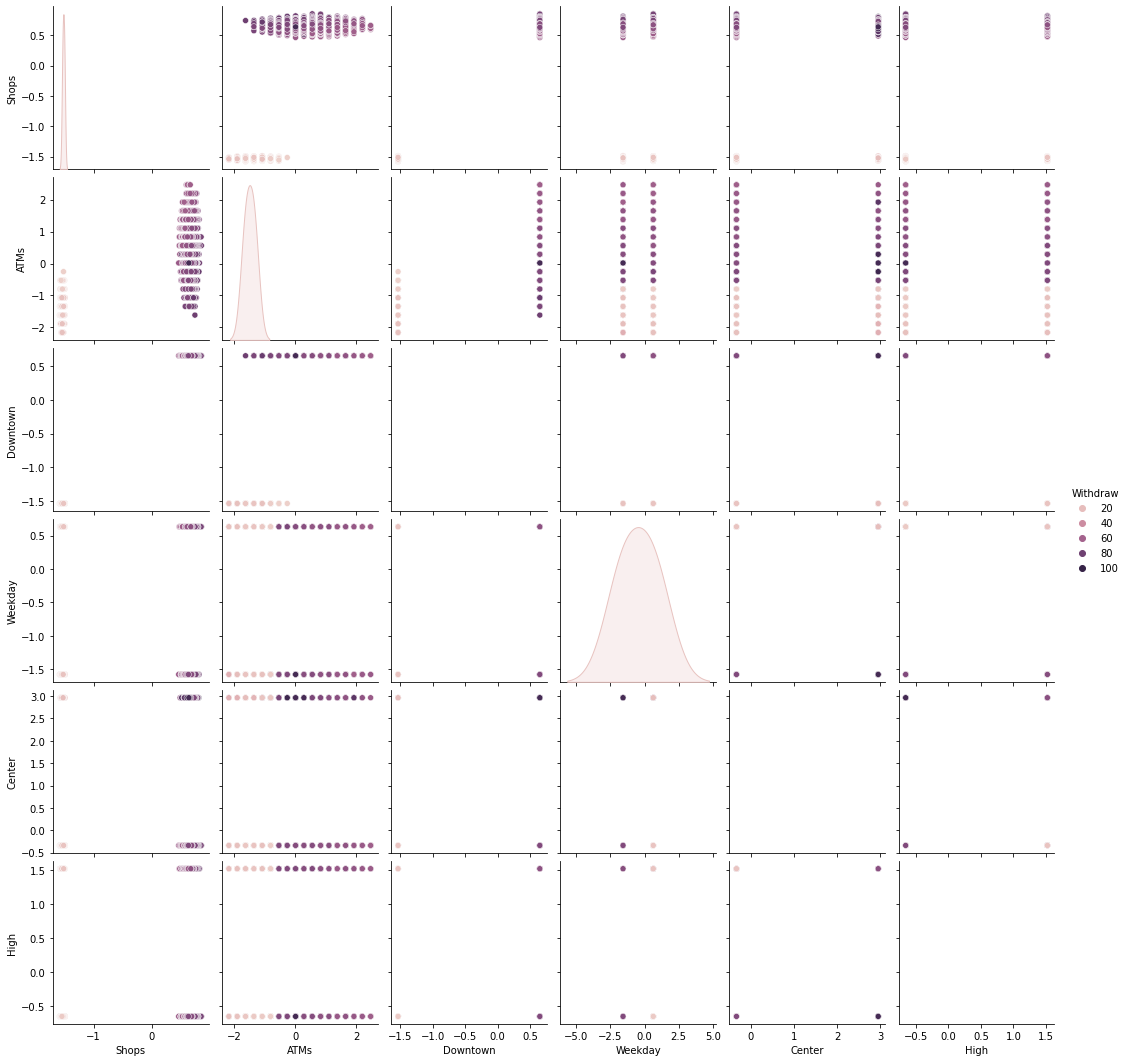

In [ ]:
# Our dependent variable is "Withdraw" lets see this as hue on the pairplot
sns.pairplot(csv, hue="Withdraw");

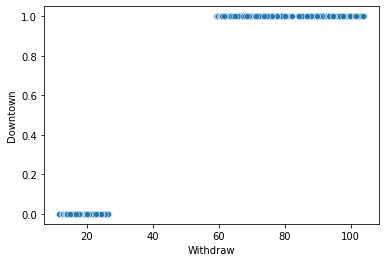

In [ ]:
# Looking at highly correlated variables:
sns.scatterplot(x="Withdraw", y="Downtown", data=csv);
# We see that when Downtown = 1, we have a greater value of withdraw 

In [ ]:
print("----- Downtown = 0 -----")
print(csv[csv['Downtown'] == 0]['Withdraw'].describe())
print("\n----- Downtown = 1 -----")
print(csv[csv['Downtown'] == 1]['Withdraw'].describe())

# We see from this that there is no overlap in withdraw values when 'Downtown' = 0 and 'Downtown' = 1

----- Downtown = 0 -----
count    6556.000000
mean       16.762582
std         1.976004
min        11.668197
25%        15.406924
50%        16.490919
75%        17.870472
max        26.383424
Name: Withdraw, dtype: float64

----- Downtown = 1 -----
count    15444.000000
mean        70.737277
std          5.251994
min         59.118507
25%         67.870035
50%         70.120582
75%         72.454415
max        103.964065
Name: Withdraw, dtype: float64


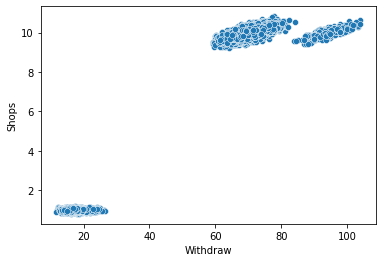

In [ ]:
## Now looking "Withdraw" and "Shops" 
sns.scatterplot(x="Withdraw", y="Shops", data=csv);
# Similarly, when the number of shops is high we also have a greater value of withdraw

In [ ]:
print("----- Shops < 5 -----")
print(csv[csv['Shops'] < 5]['Withdraw'].describe())
print("\n----- Shops >= 5 -----")
print(csv[csv['Shops'] >= 5]['Withdraw'].describe())

# We see from this that there is no overlap in withdraw values when 'Shops' < 5 and 'Shops' >= 5

----- Shops < 5 -----
count    6556.000000
mean       16.762582
std         1.976004
min        11.668197
25%        15.406924
50%        16.490919
75%        17.870472
max        26.383424
Name: Withdraw, dtype: float64

----- Shops >= 5 -----
count    15444.000000
mean        70.737277
std          5.251994
min         59.118507
25%         67.870035
50%         70.120582
75%         72.454415
max        103.964065
Name: Withdraw, dtype: float64


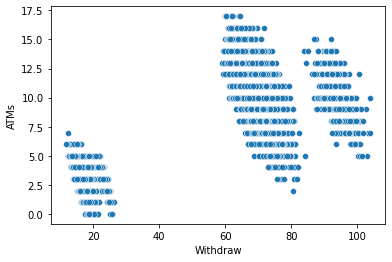

In [ ]:
## Now looking "Withdraw" and "ATMs" 
sns.scatterplot(x="Withdraw", y="ATMs", data=csv);
# We see that there is a positive correlation between ATMs and Withdraw

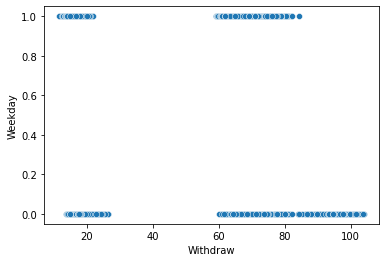

In [ ]:
sns.scatterplot(x="Withdraw", y="Weekday", data=csv);
# We observe a small negative correlation between Weekday and Withdraw

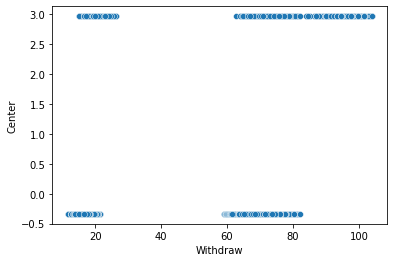

In [ ]:
sns.scatterplot(x="Withdraw", y="Center", data=csv);
# We observe a small positive correlation between Center and Withdraw

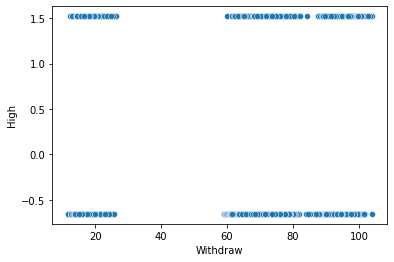

In [ ]:
sns.scatterplot(x="Withdraw", y="High", data=csv);
# We observe that High and Withdraw are close to uncorrelated

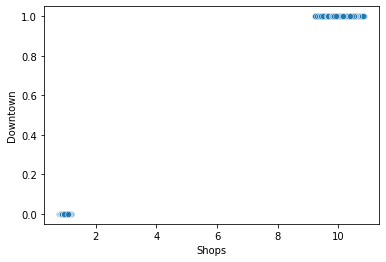

In [ ]:
# Lets check the highly correlated independent variables 
sns.scatterplot(x="Shops", y="Downtown", data=csv);

In [ ]:
csv.loc[:,['Shops','Downtown']].corr()
# To solve this issue we can remove the highly correlated variables 'Shops' and 'Downtown' and create a new interaction variable (e.g. by adding/multiplying them)
# This should be done in preprocessing

,Shops,Downtown
Shops,1.000000,0.999131
Downtown,0.999131,1.000000


In [ ]:
train = csv.copy()

In [ ]:
# Check for null data in the test dataset
test.isna().sum() * 100 / len(test)

Shops       0.0
ATMs        0.0
Downtown    0.0
Weekday     0.0
Center      0.0
High        0.0
Withdraw    0.0
dtype: float64

## Feature Selection

Note that the features we select are based on what is best for linear regression results (adjusted R^2)

### Combining the covariates of Shops, Downtown and ATMs

Note that we apply this on raw data.

In [ ]:
# First run - running regression on raw data
data = csv.copy()
response = ['Withdraw']
predictors=['Shops', 'Weekday', 'Center', 'High','Downtown','ATMs']

endog = np.ravel(data[response])
exog = sm.add_constant(data[predictors])

reg_sm_EDA = sm.OLS(endog = endog, exog = exog)
res_EDA = reg_sm_EDA.fit()

print(res_EDA.summary())
print('AIC :',res_EDA.aic)

To figure out which covariate to keep out of Shops, Downtown and ATMs, we will run regressions with all variables and one of these 3 at any one time. Running 3 regressions then we compare the adjusted R-squared to see which one has highest adjusted R-Squared

In [ ]:
# Second run - running regression on raw data - only include Shops among the 3 correlated covariates
data = csv.copy()
response = ['Withdraw']
predictors=['Shops', 'Weekday', 'Center', 'High']

endog = np.ravel(data[response])
exog = sm.add_constant(data[predictors])

reg_sm_EDA = sm.OLS(endog = endog, exog = exog)
res_EDA = reg_sm_EDA.fit()

print(res_EDA.summary())

In [ ]:
# Third run - running regression on raw data - only include ATMs among the 3 correlated covariates
data = csv.copy()
response = ['Withdraw']
predictors=['ATMs', 'Weekday', 'Center', 'High']

endog = np.ravel(data[response])
exog = sm.add_constant(data[predictors])

reg_sm_EDA = sm.OLS(endog = endog, exog = exog)
res_EDA = reg_sm_EDA.fit()

print(res_EDA.summary())

In [ ]:
# Fourth run - running regression on raw data - only include Downtown among the 3 correlated covariates
data = csv.copy()
response = ['Withdraw']
predictors=['Downtown', 'Weekday', 'Center', 'High']

endog = np.ravel(data[response])
exog = sm.add_constant(data[predictors])

reg_sm_EDA = sm.OLS(endog = endog, exog = exog)
res_EDA = reg_sm_EDA.fit()

print(res_EDA.summary())

In [ ]:
# Fifth run - running regression on raw data - combining the 3 correlated covariates through addition
data = csv.copy()
data['Downtown_Shops_ATMs_Sum'] = data['Downtown'] + data['Shops'] + data['ATMs']
response = ['Withdraw']
predictors=['Downtown_Shops_ATMs_Sum', 'Weekday', 'Center', 'High']

endog = np.ravel(data[response])
exog = sm.add_constant(data[predictors])

reg_sm_EDA = sm.OLS(endog = endog, exog = exog)
res_EDA = reg_sm_EDA.fit()

print(res_EDA.summary())

In [ ]:
# Sixth run - running regression on raw data - combining the 3 correlated covariates through multiplication
data = csv.copy()
data['Downtown_Shops_ATMs_Multiplied'] = data['Downtown'] * data['Shops'] * data['ATMs']
response = ['Withdraw']
predictors=['Downtown_Shops_ATMs_Multiplied', 'Weekday', 'Center', 'High']

endog = np.ravel(data[response])
exog = sm.add_constant(data[predictors])

reg_sm_EDA = sm.OLS(endog = endog, exog = exog)
res_EDA = reg_sm_EDA.fit()

print(res_EDA.summary())

Results/Comments:

As we know, Shops, ATMs, and Downtown are highly correlated. This section explores 6 ways to combine these covariates:
  1. Dropping ATMs and Downtown --> only keeping Shops
  2. Dropping Shops and Downtown --> only keeping ATMs
  3. Dropping Shops and ATMs --> only keeping Downtown
  4. Adding ATMs, Downtown and Shops 
  5. Multiplying ATMs, Downtown and Shops

We run 5 experiments, using all the other predictors in combination with each way of combining covariates that we listed, then we compare the adjusted R-Squared of the experiments to determine which is the best way to combine the covariates (meaning which combination leads to highest explained variance).

Out of these  regressions we ran, the regression where we kept only Shops has the highest adjusted R-squared of 0.984 (ATMs is 0.691, and Downtown is 0.979, Adding is 0.903, and Multiplying is 0.823). Hence the best way to combine covariates is just keeping Shops.

One interesting thing is that the best way to combine covariates still has a lower adjusted R-Squared than the original data (not combining covariates has adj-rsquared of 0.990).

In [ ]:
# Lastly checking correlation of our best way to combine the correlated covariates
predictors=['Shops', 'Weekday', 'Center', 'High']
csv[predictors].corr()

### Feature Engineering

Note that we apply this on raw data.

In this section, we combine the correlated covariates based on the best results from the previous section, which is to keep only Shops. 

Then, we generate feature interactions of degrees up till 3 for predictors=['Shops', 'Weekday', 'Center', 'High'] (should be explained as combinations). We then select the suitable feature interactions based on significant p-values.

In [ ]:
# Creating feature interactions up till interactions of 3 features based on best covariates combination.
data = csv.copy()

response = ['Withdraw']
predictors=['Shops', 'Weekday', 'Center', 'High']

poly = PolynomialFeatures(degree = 3,interaction_only=True)
X = poly.fit_transform(data[predictors])
X = pd.DataFrame(X, columns = poly.get_feature_names_out())


endog = np.ravel(data[response])
exog = sm.add_constant(X)

reg_sm_EDA = sm.OLS(endog = endog, exog = exog)
res_EDA = reg_sm_EDA.fit()

print(res_EDA.summary())

In [ ]:
# Based on result of previous regression, we drop all the interaction terms that had a p-value > 0.05, keeping only the significant interaction terms
# So the interactions formed will be : 
# Shops Center, Shops Weekday Center

data = csv.copy()
data['Shops Weekday Center'] = data['Shops'] * data['Weekday'] * data['Center']
data['Shops Center'] = data['Shops'] * data['Center']
response = ['Withdraw']
predictors=['Shops', 'Weekday', 'Center', 'High','Shops Center','Shops Weekday Center']

endog = np.ravel(data[response])
exog = sm.add_constant(data[predictors])

reg_sm_EDA = sm.OLS(endog = endog, exog = exog)
res_EDA = reg_sm_EDA.fit()

print(res_EDA.summary())
print("")
print(f'AIC : {res_EDA.aic}')

In [ ]:
# Lastly checking correlation of our best features (run previous cell first)
data[predictors].corr()

Results/Comments:

After combining the covariates by only keeping Shops, we ran regression using interaction terms generated till degree 3. We then find that the only significant interaction terms are  Shops Center, Shops Weekday Center.

The final regression inlcuding interaction terms is then run using the predictors of ['Shops', 'Weekday', 'Center', 'High','Shops Center','Shops Weekday Center']. 

This way of feature selection results in an adjusted R-squared of 0.993 and AIC of 94013.6683, which is an improvement over the original dataset features (all columns), which has adj R-Squared of 0.990 and AIC of 102773.7533.


# Modelling 

We will have processed versions of data:
1. Experiment 1 - Regular data (raw data) 

    {standardize = False, combine_correlated_covariates = False, feature_interaction = False }
2. Experiment 2 - Standardized data 

    {standardize = True, combine_correlated_covariates = False, feature_interaction = False }
3. Experiment 3 - Regular data with correlated covariates combined 

    {standardize = False, combine_correlated_covariates = True, feature_interaction = False }
4. Experiment 4 - Standardized data with correlated covariates combined 

    {standardize = True, combine_correlated_covariates = True, feature_interaction = False }
5. Experiment 5 - Regular data with correlated covariates combined and feature interactions 
  
    {standardize = False, combine_correlated_covariates = True, feature_interaction = True }
6. Experiment 6 -Standardized data with correlated covariates combined and feature interactions 

    {standardize = True, combine_correlated_covariates = True, feature_interaction = True }

* Note that feature selection was chosen based on what improves linear regression and it's variants results.

Models to try:
1. Multiple linear regression
2. Lasso regression 
3. Ridge regression 
4. Elastic Net regression 
5. KNN regression


6. Neural Networks

To select the best model, we will make a split in the train dataset to a train and validation set. For models 1-5, we select the best model parameters through cross validation. Additionally for models 2 and 3, we also select best models through AIC BIC method.


We then re-train the best model on the entire dataset.

Limitation : 
1. Our validation set split might be random and biased --> how do we know validation set reflects the test set?

2. Our validation set is to compare across the CV approach and the AIC BIC approach

3. 

In [ ]:
# Parameters to set by whoever is running notebook:
standardize = True
combine_correlated_covariates = False
feature_interaction = False


# Reading in data
csv = pd.read_csv('ATM_training.csv')  
test = pd.read_csv('ATM_test.csv')  

# Train - validation split - 70% Training 30% Test
train,val = train_test_split(csv, test_size=0.3, random_state=random_state)
val = pd.concat([val,test]).reset_index(drop=True)

In [ ]:
response = ['Withdraw']
predictors=[x for x in list(csv.columns) if x not in response] # the list all predictors

# All predictors are numerical predictors

if combine_correlated_covariates == True:
  predictors=['Shops', 'Weekday', 'Center', 'High']

# Feature interaction must only be applied if combine_correlated_covariates == True
if feature_interaction == True:
  if combine_correlated_covariates != True:
    raise Exception("Feature interaction must be applied in conjunction with combining correlated covariates. Set combine_correlated_covariates = True.")
  response = ['Withdraw']
  predictors=['Shops', 'Weekday', 'Center', 'High','Shops Center','Shops Weekday Center']
  train['Shops Weekday Center'] = train['Shops'] * train['Weekday'] * train['Center']
  train['Shops Center'] = train['Shops'] * train['Center']
  val['Shops Weekday Center'] = val['Shops'] * val['Weekday'] * val['Center']
  val['Shops Center'] = val['Shops'] * val['Center']


# Add test data to validation set 


# Standardize data
# Note that all predictors are numerical, don't need to specify list of numerical predictors
if standardize == True:
  mu=train[predictors].mean() 
  sigma=train[predictors].std() 
  train[predictors]=(train[predictors]-mu)/sigma
  val[predictors]=(val[predictors]-mu)/sigma







In [ ]:
# Setting up parameters to search through

# Alphas for Ridge, Lasso (aic bic method) and Enet
alphas = np.exp(np.linspace(-10,20,200))  
# l1_ratio for Enet 
l1_ratios=[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99] 
# Neighbours for KNNs
neighbours=np.arange(1, 61,3)


### Model selection through Cross Validation 

In [ ]:
# Setting CV = 5 for selecting model parameters 
CV = 5

# Fit regular linear regression
reg = linear_model.LinearRegression()
reg.fit(train[predictors], train[response])


# Fit Lasso CV, Ridge CV and Enet CV
lasso_cv = LassoCV(cv=CV)
lasso_cv.fit(train[predictors], np.ravel(train[response])) # the np.ravel is a necessary detail for compatibility
print("Best LASSO Lambda: {0}".format(lasso_cv.alpha_))


ridge_cv = RidgeCV(alphas=alphas, cv=CV)
ridge_cv.fit(train[predictors], np.ravel(train[response]))
print("Best Ridge Lambda: {0}".format(ridge_cv.alpha_))

ridge_cv_MSE = RidgeCV(cv=CV, scoring = 'neg_mean_squared_error')
ridge_cv_MSE.fit(train[predictors], np.ravel(train[response])) # the np.ravel is a necessary detail for compatibility
print("Best Ridge Lambda based on MSE: {0}".format(ridge_cv_MSE.alpha_))

enet_cv = ElasticNetCV(l1_ratio=l1_ratios,cv=CV)
enet_cv.fit(train[predictors],np.ravel(train[response]))
print("Best Elastic Net Lambda: {0}, Best L1_Ratio : {1}".format(enet_cv.alpha_,enet_cv.l1_ratio_))


# Fit KNN Regressor
knn_cv_rmse = []
for k in neighbours: 
    knn = KNeighborsRegressor(n_neighbors= k) 
    scores = cross_val_score(knn, train[predictors], np.ravel(train[response]), cv=CV, scoring = 'neg_mean_squared_error')
    # taking the average MSE across folds, then taking the square root to generate RMSE
    rmse = np.sqrt(-1*np.mean(scores)) 
    knn_cv_rmse.append(rmse)
    
print('Best KNN Regressor K = {}'.format(neighbours[np.argmin(knn_cv_rmse)]))   

Best LASSO Lambda: 0.02471489457616553
Best Ridge Lambda: 0.004860406678683492
Best Ridge Lambda based on MSE: 0.1
Best Elastic Net Lambda: 0.02496453997592478, Best L1_Ratio : 0.99
Best KNN Regressor K = 4


In [ ]:
# Refitting lasso, ridge and enet regressions with the best parameters
ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(train[predictors], np.ravel(train[response]))

ridge_MSE_model = Ridge(alpha=ridge_cv_MSE.alpha_)
ridge_MSE_model.fit(train[predictors], np.ravel(train[response]))


enet = ElasticNet(alpha=enet_cv.alpha_, l1_ratio=enet_cv.l1_ratio_)
enet.fit(train[predictors],np.ravel(train[response]))
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(train[predictors], np.ravel(train[response])) 

best_k = neighbours[np.argmin(knn_cv_rmse)]
knn = KNeighborsRegressor(n_neighbors= best_k) 
knn.fit(train[predictors], np.ravel(train[response])) 

print("")

### Model selection using AIC and BIC (lasso and ridge) 

In [ ]:
# Model selection using  AIC/BIC


alphas = np.exp(np.linspace(-10,20,200)) # Same as in sklearn method 
l1_ratios=[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99] # Same as sklearn method

result_dict = {
    'model':[],
    'l1_ratio': [],
    'alpha': [],
    'AIC': [],
    'BIC': []
}

endog = np.ravel(train[response])
exog = sm.add_constant(train[predictors])

# We use statsmodels to implement AIC, BIC model selection

# We find the AIC and BIC of Lasso, Ridge and Elastic Net using similar parameter grid as in sklearn result - only the alpha grid for lasso regression is slightly different
# This involves looping through all alphas and l1_ratios, and then making a dataframe compiling the best params + AIC and BIC scores
# To implement the AIC/BIC sscores, need a OLSResults class object. However, statsmodels didn't implement this for regularized regression
# So I'm using this fix : https://stackoverflow.com/questions/40072870/statistical-summary-table-in-sklearn-linear-model-ridge
for alpha in alphas:
  lasso_sm = sm.OLS(endog = endog, exog = exog)
  lasso_sm_fitted = lasso_sm.fit_regularized(method='elastic_net', L1_wt = 1, alpha=alpha)
  pinv_wexog,_ = pinv_extended(lasso_sm.wexog)
  normalized_cov_params = np.dot(pinv_wexog, np.transpose(pinv_wexog))

  lasso_sm_result = sm.regression.linear_model.OLSResults(lasso_sm, 
                                                lasso_sm_fitted.params, 
                                                normalized_cov_params)


  result_dict['model'].append('Lasso')
  result_dict['l1_ratio'].append(1)
  result_dict['alpha'].append(alpha)
  result_dict['AIC'].append(lasso_sm_result.aic)
  result_dict['BIC'].append(lasso_sm_result.bic)


  ridge_sm = sm.OLS(endog = endog, exog = exog)
  ridge_sm_fitted = ridge_sm.fit_regularized(method='elastic_net', L1_wt = 0, alpha=alpha)
  pinv_wexog,_ = pinv_extended(ridge_sm.wexog)
  normalized_cov_params = np.dot(pinv_wexog, np.transpose(pinv_wexog))

  ridge_sm_result = sm.regression.linear_model.OLSResults(ridge_sm, 
                                                ridge_sm_fitted.params, 
                                                normalized_cov_params)
  result_dict['model'].append('Ridge')
  result_dict['l1_ratio'].append(0)
  result_dict['alpha'].append(alpha)
  result_dict['AIC'].append(ridge_sm_result.aic)
  result_dict['BIC'].append(ridge_sm_result.bic)

AIC_BIC_results = pd.DataFrame(result_dict)



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Get the best lasso and ridge models based on AIC and BIC
BIC_best_lasso_alpha = AIC_BIC_results[AIC_BIC_results['model'] == 'Lasso'].sort_values(by= 'BIC', ascending=True).reset_index(drop=True)['alpha'][0]

BIC_best_ridge_alpha = AIC_BIC_results[AIC_BIC_results['model'] == 'Ridge'].sort_values(by= 'BIC', ascending=True).reset_index(drop=True)['alpha'][0]


AIC_best_lasso_alpha =  AIC_BIC_results[AIC_BIC_results['model'] == 'Lasso'].sort_values(by= 'AIC', ascending=True).reset_index(drop=True)['alpha'][0]

AIC_best_ridge_alpha = AIC_BIC_results[AIC_BIC_results['model'] == 'Ridge'].sort_values(by= 'AIC', ascending=True).reset_index(drop=True)['alpha'][0]


BIC_lasso = Lasso(alpha = BIC_best_lasso_alpha )
AIC_lasso = Lasso(alpha = AIC_best_lasso_alpha )
BIC_ridge = Ridge(alpha = BIC_best_ridge_alpha)
AIC_ridge = Ridge(alpha = AIC_best_ridge_alpha)


print("Best Lasso Lambda based on BIC:",BIC_best_lasso_alpha)
print("Best Lasso Lambda based on AIC:",AIC_best_lasso_alpha)
print("Best Ridge Lambda based on BIC:",BIC_best_ridge_alpha)
print("Best Ridge Lambda based on AIC:",AIC_best_ridge_alpha)



BIC_lasso.fit(train[predictors], np.ravel(train[response]))
AIC_lasso.fit(train[predictors], np.ravel(train[response]))
BIC_ridge.fit(train[predictors], np.ravel(train[response]))
AIC_ridge.fit(train[predictors], np.ravel(train[response]))

print("")

Best Lasso Lambda based on BIC: 0.008882980908164468
Best Lasso Lambda based on AIC: 0.008882980908164468
Best Ridge Lambda based on BIC: 4.5399929762484854e-05
Best Ridge Lambda based on AIC: 4.5399929762484854e-05



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.660e+03, tolerance: 9.681e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.660e+03, tolerance: 9.681e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


### Final model selection based on validation set MSE

In [ ]:
# Ridge model with lambda chosen by minimizing AIC
AIC_ridge_predict = AIC_ridge.predict(val[predictors])

# Ridge model with lambda chosen by minimizing BIC
BIC_ridge_predict = BIC_ridge.predict(val[predictors])

# Lasso model with lambda chosen by minimizing AIC
AIC_lasso_predict = AIC_lasso.predict(val[predictors])

# Lasso model with lambda chosen by minimizing BIC
BIC_lasso_predict = BIC_lasso.predict(val[predictors])

# Lasso model with lambda chosen by CV maximizing R^2
lasso_predict = lasso.predict(val[predictors]) 

# Elastic net model with lambda chosen by CV maximizing R^2
enet_predict = enet.predict(val[predictors]) 

# Ridge model with lambda chosen by CV maximizing R^2
ridge_predict = ridge.predict(val[predictors]) 

# Ridge model with lambda chosen by CV maximizing MSE
ridge_MSE_model_predict = ridge_MSE_model.predict(val[predictors]) 

# Regression model with lambda chosen by CV maximizing R^2
reg_predict = reg.predict(val[predictors]) 

# KNN model with K chosen via CV MSE
knn_predict = knn.predict(val[predictors]) 


# Computing MSE of predictions on validation set 
AIC_ridge_MSE = mean_squared_error(np.ravel(val[response]), AIC_ridge_predict) 
BIC_ridge_MSE = mean_squared_error(np.ravel(val[response]), BIC_ridge_predict) 
AIC_lasso_MSE = mean_squared_error(np.ravel(val[response]), AIC_lasso_predict) 
BIC_lasso_MSE = mean_squared_error(np.ravel(val[response]), BIC_lasso_predict) 

lasso_MSE =  mean_squared_error(np.ravel(val[response]), lasso_predict) 
enet_MSE = mean_squared_error(np.ravel(val[response]), enet_predict) 
ridge_MSE = mean_squared_error(np.ravel(val[response]), ridge_predict) 
ridge_MSE_MSE = mean_squared_error(np.ravel(val[response]), ridge_MSE_model_predict)
reg_MSE = mean_squared_error(np.ravel(val[response]), reg_predict) 
knn_MSE = mean_squared_error(np.ravel(val[response]), knn_predict) 

prediction_dict = {
    'ridge_regression (lambda selected using AIC)' : [AIC_ridge_MSE],
    'ridge_regression (lambda selected using BIC)' : [BIC_ridge_MSE],
    'ridge_regression (lambda selected using CV MSE)' : [ridge_MSE_MSE],
    'ridge_regression (lambda selected using CV R^2)' : [ridge_MSE],

    'lasso_regression (lambda selected using AIC)' : [AIC_lasso_MSE],
    'lasso_regression (lambda selected using BIC)' : [BIC_lasso_MSE],
    'lasso_regression (lambda selected using CV R^2)' : [lasso_MSE],

    'elastic_net_regression (lambda selected using CV R^2)' : [enet_MSE],
    'KNN_regression (K selected using CV MSE)': [knn_MSE],

    'linear_regression' : [reg_MSE],
}



val_result = pd.DataFrame(prediction_dict,index= ['Validation MSE']).T

In [ ]:
val_result.sort_values(by = 'Validation MSE')

,Validation MSE
KNN_regression (K selected using CV MSE),0.368149
ridge_regression (lambda selected using CV MSE),6.263280
ridge_regression (lambda selected using CV R^2),6.263540
ridge_regression (lambda selected using AIC),6.263558
ridge_regression (lambda selected using BIC),6.263558
linear_regression,6.263558
lasso_regression (lambda selected using AIC),6.479831
lasso_regression (lambda selected using BIC),6.479831
lasso_regression (lambda selected using CV R^2),6.739071
elastic_net_regression (lambda selected using CV R^2),6.745652


### Training NN on train set and predict on validation set MSE

Must be done for each experiment

In [ ]:
# Use validation set that was prepared, and train set, with no CV
# If you can specify CV = 5

# Create 1 layer perceptron
def create_nn(init_mode, hidden_layer1, dropout): 
  # Define model
  model = Sequential()
  model.add(Dense(hidden_layer1, kernel_initializer=init_mode, input_dim=train[predictors].shape[1], activation='relu'))
  model.add(Dense(1, kernel_initializer=init_mode))    # We predict a single number
  # Compile model
  model.compile(optimizer='adam',                # optimiser from tut (maybe see if there is a better one)
                loss='mean_squared_error')
  return model

# Create Neural Network with 2 layers (MLP)
def create_mlp_2layer(init_mode, hidden_layer1, hidden_layer2, dropout): 
  # Define model
  model = Sequential()
  model.add(Dense(hidden_layer1, kernel_initializer=init_mode, input_dim=train[predictors].shape[1], activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(hidden_layer2, kernel_initializer=init_mode, activation='relu'))
  model.add(Dense(1, kernel_initializer=init_mode))    # We predict a single number
  # Compile model
  model.compile(optimizer='adam',                # optimiser from tut (maybe see if there is a better one)
                loss='mean_squared_error')
  return model

  # Create Neural Network with 3 layers (MLP)
def create_mlp_3layer(init_mode, hidden_layer1, hidden_layer2, hidden_layer3, dropout): 
  # Define model
  model = Sequential()
  model.add(Dense(hidden_layer1, kernel_initializer=init_mode, input_dim=train[predictors].shape[1], activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(hidden_layer2, kernel_initializer=init_mode, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(hidden_layer3, kernel_initializer=init_mode, activation='relu'))
  model.add(Dense(1, kernel_initializer=init_mode))    # We predict a single number
  # Compile model
  model.compile(optimizer='adam',                # optimiser from tut (maybe see if there is a better one)
                loss='mean_squared_error')
  return model

In [ ]:
# Hyperoparameter tuning for neural network with 1 hidden layer 
# Parameters
batch_size = 250    # Initial batch size
# hidden_layer1 = 16
# hidden_layer2 = 8
dropout = 0.1
epochs = 30

# define the grid search parameters
init_modes = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
hidden_layer_sizes = [8,16,32,64]
    
best_init_mode = ""
best_hidden_layer = -1
best_mse = 9999999
for x in init_modes:
  for hidden_layer in hidden_layer_sizes: 
    model = create_nn(x, hidden_layer, dropout)


    # Update our model fit call
    history = model.fit(train[predictors],
                        train[response],
                        epochs=epochs, 
                        batch_size=batch_size,
                        verbose=0)
    yhat = model.predict(val[predictors])
    mse = mean_squared_error(val[response], yhat)
    print(f"init_mode = {x}, hidden_layer = {hidden_layer} yields mse = {mse}")
    if mse < best_mse: 
      best_mse = mse
      best_init_mode = x
      best_hidden_layer = hidden_layer


print(f'Best mse: {best_mse}\nBest init_mode: {best_init_mode}\nBest hidden_layer: {best_hidden_layer}')

KeyboardInterrupt: ignored

In [ ]:
# Hyperoparameter tuning for neural network with 2 hidden layers 
# Parameters
batch_size = 250    # Initial batch size
# hidden_layer1 = 16
# hidden_layer2 = 8
dropout = 0.1
epochs = 30

# define the grid search parameters
init_modes = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
hidden_layer_sizes = [8,16,32,64]

# Dictionary to help remove init_modes from 3 layer experiment
avg_mse_init_modes = {'uniform':0.0, 'lecun_uniform':0.0, 'normal':0.0, 'zero':0.0, 'glorot_normal':0.0, 'glorot_uniform':0.0, 'he_normal':0.0, 'he_uniform':0.0} 
counter = 0
    
best_init_mode = ""
best_hidden_layer1 = -1
best_hidden_layer2 = -1
best_mse = 9999999
for x in init_modes:
  for hidden_layer1 in hidden_layer_sizes: 
    for hidden_layer2 in hidden_layer_sizes:
      model = create_mlp_2layer(x, hidden_layer1, hidden_layer2, dropout)

      # Update our model fit call
      model.fit(train[predictors],
                          train[response],
                          epochs=epochs, 
                          batch_size=batch_size,
                          verbose=0)
      yhat = model.predict(val[predictors])
      mse = mean_squared_error(val[response], yhat)
      print(f"init_mode = {x}, hidden_layer1 = {hidden_layer1}, hidden_layer2 = {hidden_layer2} yields mse = {mse}")

      avg_mse_init_modes[x] = avg_mse_init_modes[x] + mse
      counter = counter + 1
      if mse < best_mse: 
        best_mse = mse
        best_init_mode = x
        best_hidden_layer1 = hidden_layer1
        best_hidden_layer2 = hidden_layer2

for key, value in avg_mse_init_modes.items():
  avg_mse_init_modes[key] = value / counter   # Calculate the average mse


print(f'Best mse: {best_mse}\nBest init_mode: {best_init_mode}\nBest hidden_layer1: {best_hidden_layer1}\nBest hidden_layer2: {best_hidden_layer2}')
print(f'Best init_mod on average: {min(avg_mse_init_modes, key=avg_mse_init_modes.get)}')


211/211 [==============================] - 0s 1ms/step
init_mode = uniform, hidden_layer1 = 8, hidden_layer2 = 8 yields mse = 5.071841287295598
211/211 [==============================] - 0s 1ms/step
init_mode = uniform, hidden_layer1 = 8, hidden_layer2 = 16 yields mse = 5.404475698619455
211/211 [==============================] - 0s 1ms/step
init_mode = uniform, hidden_layer1 = 8, hidden_layer2 = 32 yields mse = 6.084264726257884
211/211 [==============================] - 0s 925us/step
init_mode = uniform, hidden_layer1 = 8, hidden_layer2 = 64 yields mse = 6.135058011521516
211/211 [==============================] - 0s 930us/step
init_mode = uniform, hidden_layer1 = 16, hidden_layer2 = 8 yields mse = 5.085312230539853
211/211 [==============================] - 0s 978us/step
init_mode = uniform, hidden_layer1 = 16, hidden_layer2 = 16 yields mse = 4.711994691665078
211/211 [==============================] - 0s 1ms/step
init_mode = uniform, hidden_layer1 = 16, hidden_layer2 = 32 yields ms

In [ ]:
# Hyperoparameter tuning for neural network with 3 hidden layers 
# Parameters
batch_size = 250    # Initial batch size
dropout = 0.1
epochs = 30

# define the grid search parameters
init_modes = ['glorot_normal']
hidden_layer_sizes = [8,16,32,64]
    
best_init_mode = ""
best_hidden_layer1 = -1
best_hidden_layer2 = -1
best_hidden_layer3 = -1
best_mse = 9999999
for x in init_modes:
  for hidden_layer1 in hidden_layer_sizes: 
    for hidden_layer2 in hidden_layer_sizes:
      for hidden_layer3 in hidden_layer_sizes:
        model = create_mlp_3layer(x, hidden_layer1, hidden_layer2, hidden_layer3, dropout)


        # Update our model fit call
        model.fit(train[predictors],
                            train[response],
                            epochs=epochs, 
                            batch_size=batch_size,
                            verbose=0)
        yhat = model.predict(val[predictors])
        mse = mean_squared_error(val[response], yhat)
        print(f"init_mode = {x}, hidden_layer1 = {hidden_layer1}, hidden_layer2 = {hidden_layer2}, hidden_layer3 = {hidden_layer3} yields mse = {mse}")
        if mse < best_mse: 
          best_mse = mse
          best_init_mode = x
          best_hidden_layer1 = hidden_layer1
          best_hidden_layer2 = hidden_layer2
          best_hidden_layer3 = hidden_layer3

print(f'Best mse: {best_mse}\nBest init_mode: {best_init_mode}\nBest hidden_layer1: {best_hidden_layer1}\nBest hidden_layer2: {best_hidden_layer2}\nBest hidden_layer3: {best_hidden_layer3}')

211/211 [==============================] - 0s 1ms/step
init_mode = glorot_normal, hidden_layer1 = 8, hidden_layer2 = 8, hidden_layer3 = 8 yields mse = 14.007722241747745
211/211 [==============================] - 0s 936us/step
init_mode = glorot_normal, hidden_layer1 = 8, hidden_layer2 = 8, hidden_layer3 = 16 yields mse = 34.11957874166214
211/211 [==============================] - 0s 1ms/step
init_mode = glorot_normal, hidden_layer1 = 8, hidden_layer2 = 8, hidden_layer3 = 32 yields mse = 35.47606096629678
211/211 [==============================] - 0s 1ms/step
init_mode = glorot_normal, hidden_layer1 = 8, hidden_layer2 = 8, hidden_layer3 = 64 yields mse = 27.270568871998876
211/211 [==============================] - 0s 950us/step
init_mode = glorot_normal, hidden_layer1 = 8, hidden_layer2 = 16, hidden_layer3 = 8 yields mse = 11.473189569078404
211/211 [==============================] - 0s 1ms/step
init_mode = glorot_normal, hidden_layer1 = 8, hidden_layer2 = 16, hidden_layer3 = 16 yiel

Further hand-tuning was done, code was similar to the above but not included to prevent redundancy.

In [ ]:
# Best model after further hand tuning the number of nodes in each layer
model.summary()

Model: "sequential_511"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1599 (Dense)          (None, 128)               896       
                                                                 
 dropout_595 (Dropout)       (None, 128)               0         
                                                                 
 dense_1600 (Dense)          (None, 64)                8256      
                                                                 
 dense_1601 (Dense)          (None, 1)                 65        
                                                                 
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________


# Predictions on test set

For our test set predictions, we will use a KNN model with K = 4 as our final model.

In [4]:
# Replicating Experiment 2 settings (best result)
# standardize = True
# combine_correlated_covariates = False
# feature_interaction = False
best_k = 4


# Reading in test set
test = pd.read_csv('ATM_test.csv')  

response = ['Withdraw']
predictors=[x for x in list(test.columns) if x not in response] # the list all predictors

# Standardize test set, based on the mu and sigma from train set
train = pd.read_csv('ATM_training.csv')

mu=train[predictors].mean() 
sigma=train[predictors].std() 
train[predictors]=(train[predictors]-mu)/sigma
test[predictors]=(test[predictors]-mu)/sigma


# Re-train KNN model on entire train set for prediction, using K = 4 as selected in the model selection portion
knn = KNeighborsRegressor(n_neighbors= best_k) 
knn.fit(train[predictors], np.ravel(train[response])) 


knn_predict = knn.predict(test[predictors]) 
test_error = mean_squared_error(np.ravel(test[response]), knn_predict) 

print("test set MSE:",test_error)



test set MSE: 0.3314696966126892
